# Breast Cancer Analysis
## Wisconsin Diagnostic Breast Cancer (WDBC)
**Predicting the result of the diagnosis: `Malignant` or `Benign`.**

The dataset was created by **Dr. William H. Wolboerg**, **W. Nick Street** and **Olvi L. Mangasarian** in the 1990s. The dataset was donated to UCI by W. Nick Street in November 1995. 

### Some Relevant information
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available on:
1. [**UW CS ftp Server**](ftp.cs.wisc.edu) - cd 'math-prog/ cpo-dataset/ machine-learn/ cancer/ WDBC/'
2. [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

### Attribute Information
*The following information is taken from the UCI Machine Learning Repository*

1. ID number
2. Diagnosis (M = malignant, B = benign)

3...32. radius_mean ... fractal_dimension_worst

Ten real-valued features are computed for each cell nucleus:

    a. radius (mean of distances from center to points on the perimeter)
    b. texture (standard deviation of gray-scale values)
    c. perimeter
    d. area
    e. smoothness (local variation in radius lengths)
    f. compactness (perimeter^2 / area - 1.0)
    g. concavity (severity of concave portions of the contour)
    h. concave points (number of concave portions of the contour)
    i. symmetry
    j. fractal dimension ("coastline approximation" - 1)


### Results
*Note: the following information is taken from the available information in the UCI Machine Learning Repository.*

"predicting field 2, diagnosis: **B = benign, M = malignant**
- sets are **linearly separable** using all **30 input features**
- best predictive accuracy obtained using one separating plane in the 3-D space of Worst Area, Worst Smoothness and Mean Texture.  **Estimated accuracy 97.5%** using repeated 10-fold crossvalidations.  Classifier has correctly diagnosed 176 consecutive new patients as of November 1995."

### Additional Resource

One of the best analysis and presentation of the data is done by Kalshtein Yael. [*Check out his work here*](https://rstudio-pubs-static.s3.amazonaws.com/344010_1f4d6691092d4544bfbddb092e7223d2.html)

## 1. Prepare Libraries and Data

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

*Ignoring the warning*

import warnings

warnings.filterwarnings("ignore", message="numpy.dtype size changed")

warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
# Load data
data_breast_cancer = pd.read_csv("../data/data-breast-cancer.csv")
data_breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Understand the data.
data_breast_cancer.info(), data_breast_cancer.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(None,
 id                           0
 diagnosis                    0
 radius_mean                  0
 texture_mean                 0
 perimeter_mean               0
 area_mean                    0
 smoothness_mean              0
 compactness_mean             0
 concavity_mean               0
 concave points_mean          0
 symmetry_mean                0
 fractal_dimension_mean       0
 radius_se                    0
 texture_se                   0
 perimeter_se                 0
 area_se                      0
 smoothness_se                0
 compactness_se               0
 concavity_se                 0
 concave points_se            0
 symmetry_se                  0
 fractal_dimension_se         0
 radius_worst                 0
 texture_worst                0
 perimeter_worst              0
 area_worst                   0
 smoothness_worst             0
 compactness_worst            0
 concavity_worst              0
 concave points_worst         0
 symmetry_worst               0
 

### 1.1 Understanding the data - EDA
*EDA - Exploratory Data Analysis*

There are **ten real-valued features** computed for each cell nucleus. For each of these ten values, the `mean`, `standard error` and `worst` (i.e. mean of the three largest values) is available in the above data.

*Note: All feature values are recoded with four significant digits.* [from Kaggle dataset]

Some basic facts about the data.
- There are **569 data points**.
- All data is numerical - apart from `diagnosis`
- There is **no missing data** in any of the columns.
- An overview of the data proves a necesity of feature scaling.   

Two columns need to be removed.
1. The `Unnamed: 32` column:
    *The column is full of missing values, it could have been created by the creater while handling the data. It's presence would not improve the performance of the prediction model in any sense.*

2. The `id` column:
    *The column contains numbers used to identify patients. It is not useful while making predictions on the diagnonsis result.*

In [5]:
# Remove the two columns.
data_breast_cancer.drop(["Unnamed: 32", "id"], axis=1, inplace=True)
data_breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.2 Visualising Data
First an understanding of how the `mean` value varies for each of the ten attributes is seen below.

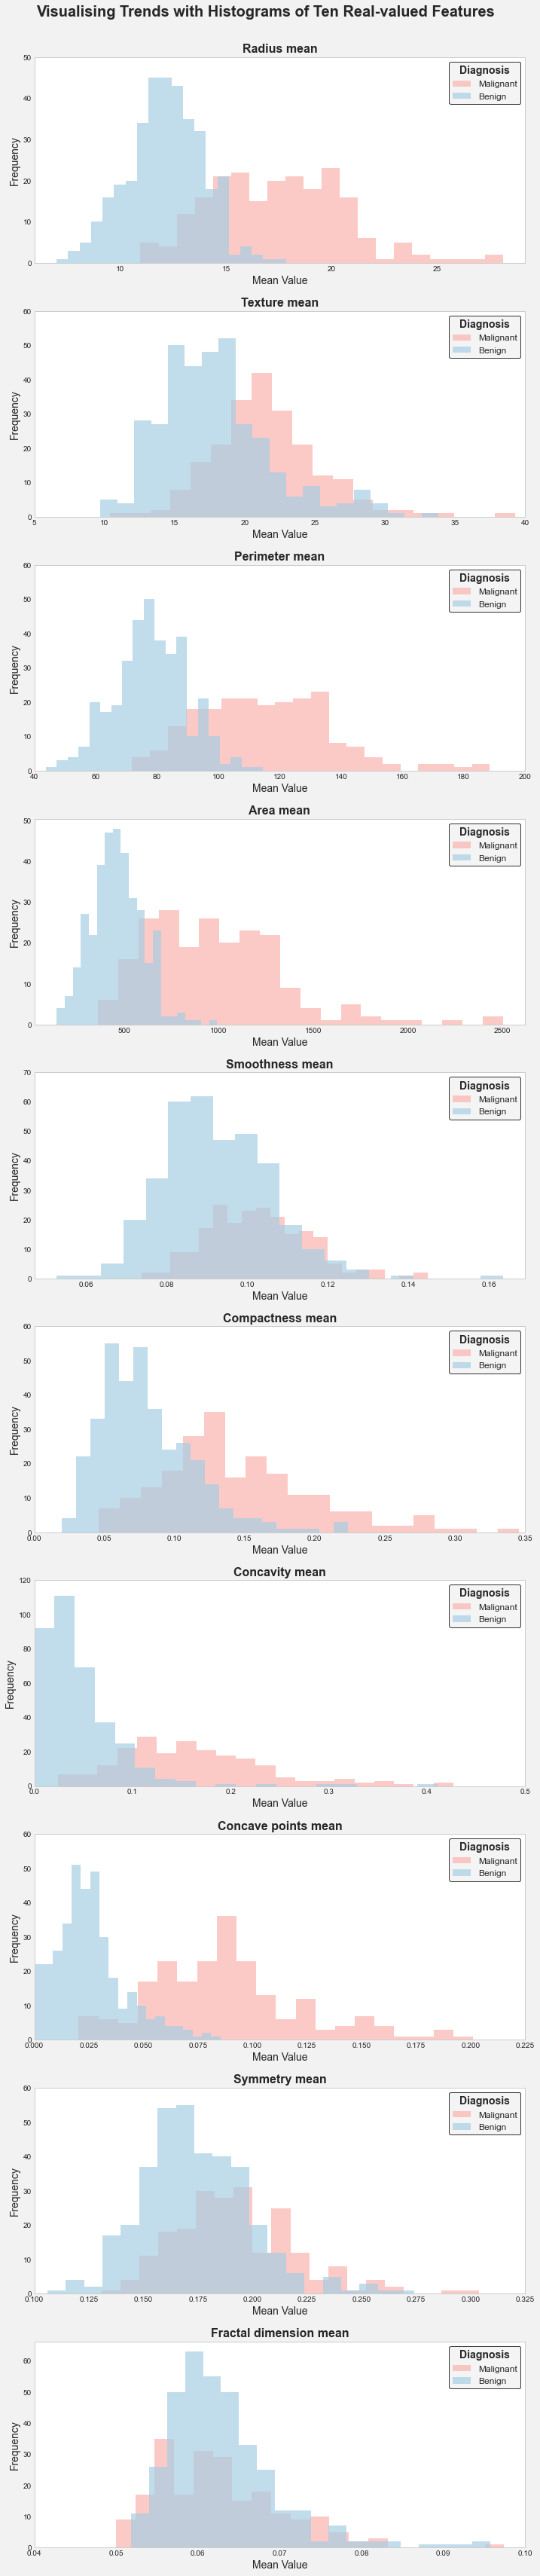

In [6]:
plt.style.use('seaborn-whitegrid')

# Assigning a smaller name to data_breast_cancer data frame
df = data_breast_cancer.copy()

# Instanciating Fig and axes in a single plot
fig, axes = plt.subplots(nrows=10,
                         ncols=1,
                         figsize=(10,50))

# Gets the ten column names from the data
columns = list(df.columns)[1:11]

# Setting up expressions for malignant and benign
malignant = df['diagnosis'] == 'M'
benign = df['diagnosis'] == 'B'

# Setting up colors
# colors = ['#CCECC6', '#A7CEE3', '#DECBE5', '#FFF2AE', '#B4E3CE','#FEDAA6', '#FEDBEC', '#CCCCCC', '#FCB4AF', '#E5D8BE']
colors_tuple = ('#FCB4AF', '#A7CEE3')

# Setting limits - setup after experimentation.
# limits = 

# Looping to create ten subplots
for ax, column in zip(axes, columns):
    df[column][malignant].plot(kind='hist', 
                               bins=20, 
                               color=colors_tuple[0],
                               alpha=0.7,
                               ax=ax)
    df[column][benign].plot(kind='hist', 
                            bins=20, 
                            color=colors_tuple[1], 
                            alpha=0.7,
                            ax=ax)
    
    ax.grid(visible=False)
    fig.set_facecolor('#F2F2F2')
    
    ax.set_title(column.replace('_', ' ').capitalize(), fontdict={'fontsize': 16, 'fontweight': 'bold'})
    ax.set_xlabel("Mean Value", fontdict={'size': 14})
    ax.set_ylabel("Frequency", fontdict={'size': 14})
    
    leg = ax.legend(['Malignant', 'Benign'], prop={'size': 12}, frameon=True)
    leg.set_title('Diagnosis', prop={'size': 14, 'weight': 'bold'})
    leg.get_frame().set_color('#F2F2F2')
    leg.get_frame().set_edgecolor('#000000')
    
# Other formatting settings
fig.suptitle("Visualising Trends with Histograms of Ten Real-valued Features",
             size=20,
             weight=1000)

plt.tight_layout(rect=[0, 0.03, 1, 0.97], pad=1.5);

axes[0].set_ylim([0, 50]);  # radius_mean

axes[1].set_xlim([5, 40]);  # texture_mean
axes[1].set_ylim([0, 60]);

axes[2].set_xlim([40, 200]);  # perimeter_mean
axes[2].set_ylim([0, 60]);

axes[4].set_ylim([0, 70]);  # smoothness_mean  

axes[5].set_xlim([0, 0.35]);  # compactness_mean
axes[5].set_ylim([0, 60]);  

axes[6].set_xlim([0, 0.5]); # concavity_mean 
axes[6].set_ylim([0, 120]);

axes[7].set_xlim([0, 0.225]);  # concave_points_mean
axes[7].set_ylim([0, 60]);  

axes[8].set_xlim([0.1, 0.325]);  # symmetry_mean
axes[8].set_ylim([0, 60]);

axes[9].set_xlim([0.04, 0.1]);  # fractal_dimension_mean

Visualising on a scatter plot:
1. `radius_mean` and `texture_mean`.
2. `concavity_mean` and `symmetry_mean`.

*To use the `diagnosis` column, the string data will need to be converted to numerical.*

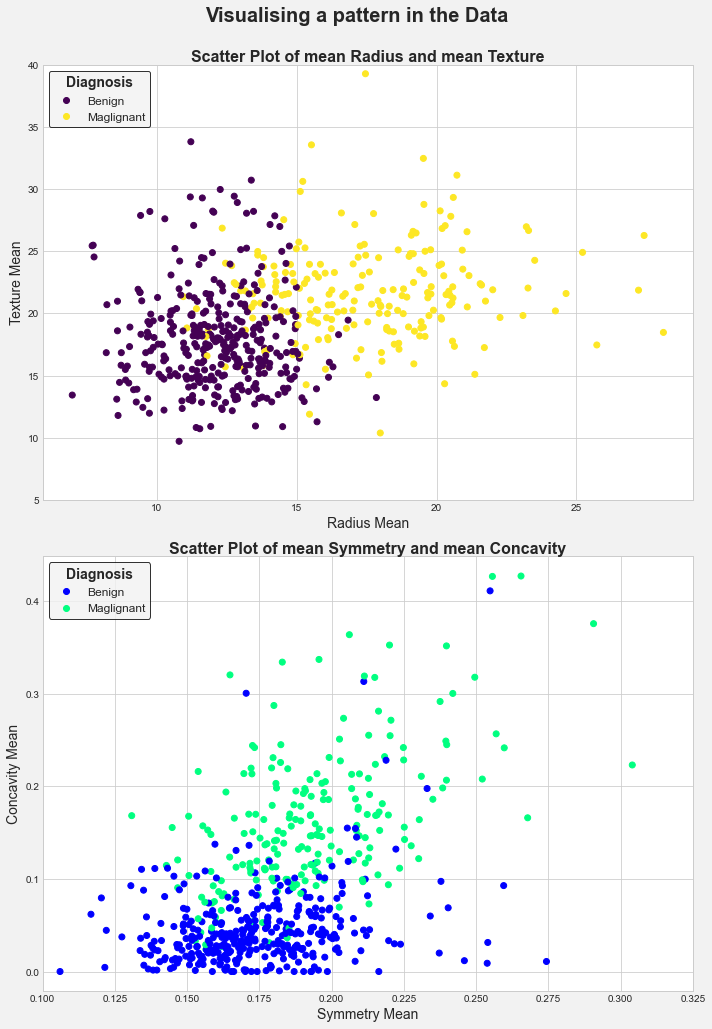

In [7]:
# Instantiating Plot
fig, (ax0, ax1) = plt.subplots(nrows=2, 
                               ncols=1, 
                               figsize=(10,15))

# Converting to numerical data
diagnosis = data_breast_cancer["diagnosis"].replace({"M": 1, "B": 0})

# Plotting data 
scatter_radius = ax0.scatter(x=data_breast_cancer["radius_mean"],
                             y=data_breast_cancer["texture_mean"],
                             c=diagnosis,
                             cmap="viridis")
scatter_symmetry = ax1.scatter(x=data_breast_cancer["symmetry_mean"],
                               y=data_breast_cancer["concavity_mean"],
                               c=diagnosis,
                               cmap="winter") 

# Other formatting settings plot 0
ax0.set_xlabel("Radius Mean",
               fontdict={"size": 14})
ax0.set_ylabel("Texture Mean",
               fontdict={"size": 14})
ax0.set_title("Scatter Plot of mean Radius and mean Texture", 
              fontdict={"fontsize": 16, "fontweight": "bold"},
              pad=2);
handles, labels = scatter_radius.legend_elements()
leg = ax0.legend(handles, ("Benign", "Maglignant"), fontsize=12, loc='upper left', frameon=True);
leg.get_frame().set_color("#F2F2F2")
leg.get_frame().set_edgecolor('black')
leg.set_title("Diagnosis", prop={"size": 14, "weight": 'bold'})
ax0.set_ylim([5, 40]);

# Other formatting settings plot 1
ax1.set_xlabel("Symmetry Mean",
               fontdict={"size": 14})
ax1.set_ylabel("Concavity Mean",
               fontdict={"size": 14})
ax1.set_title("Scatter Plot of mean Symmetry and mean Concavity", 
              fontdict={"fontsize": 16, "fontweight": "bold"},
              pad=2);
handles, labels = scatter_symmetry.legend_elements()
leg = ax1.legend(handles, ("Benign", "Maglignant"), fontsize=12, loc='upper left', frameon=True);
leg.get_frame().set_color('#F2F2F2')
leg.get_frame().set_edgecolor('black')
leg.set_title("Diagnosis", prop={"size": 14, "weight": 'bold'})
ax1.set_xlim([0.1, 0.325])

# Formatting settings for the figure
fig.suptitle("Visualising a pattern in the Data", size=20, weight=1000);
fig.set_facecolor('#F2F2F2')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

From the above visualisation, we can see some linear decesion boundary that could partially classify the data. Consideirng the two randomly chosen variables are compared, we can expect a classification algorithm that takes into consideration the `mean`, `standard error` and `worst` values of a particular data point, to perform well. 

#### Correlation Matrix
A correlation matrix might better show how each of the features correlate. The `diagnosis` column needs to be changed into `1`s and `0`s to be plot.

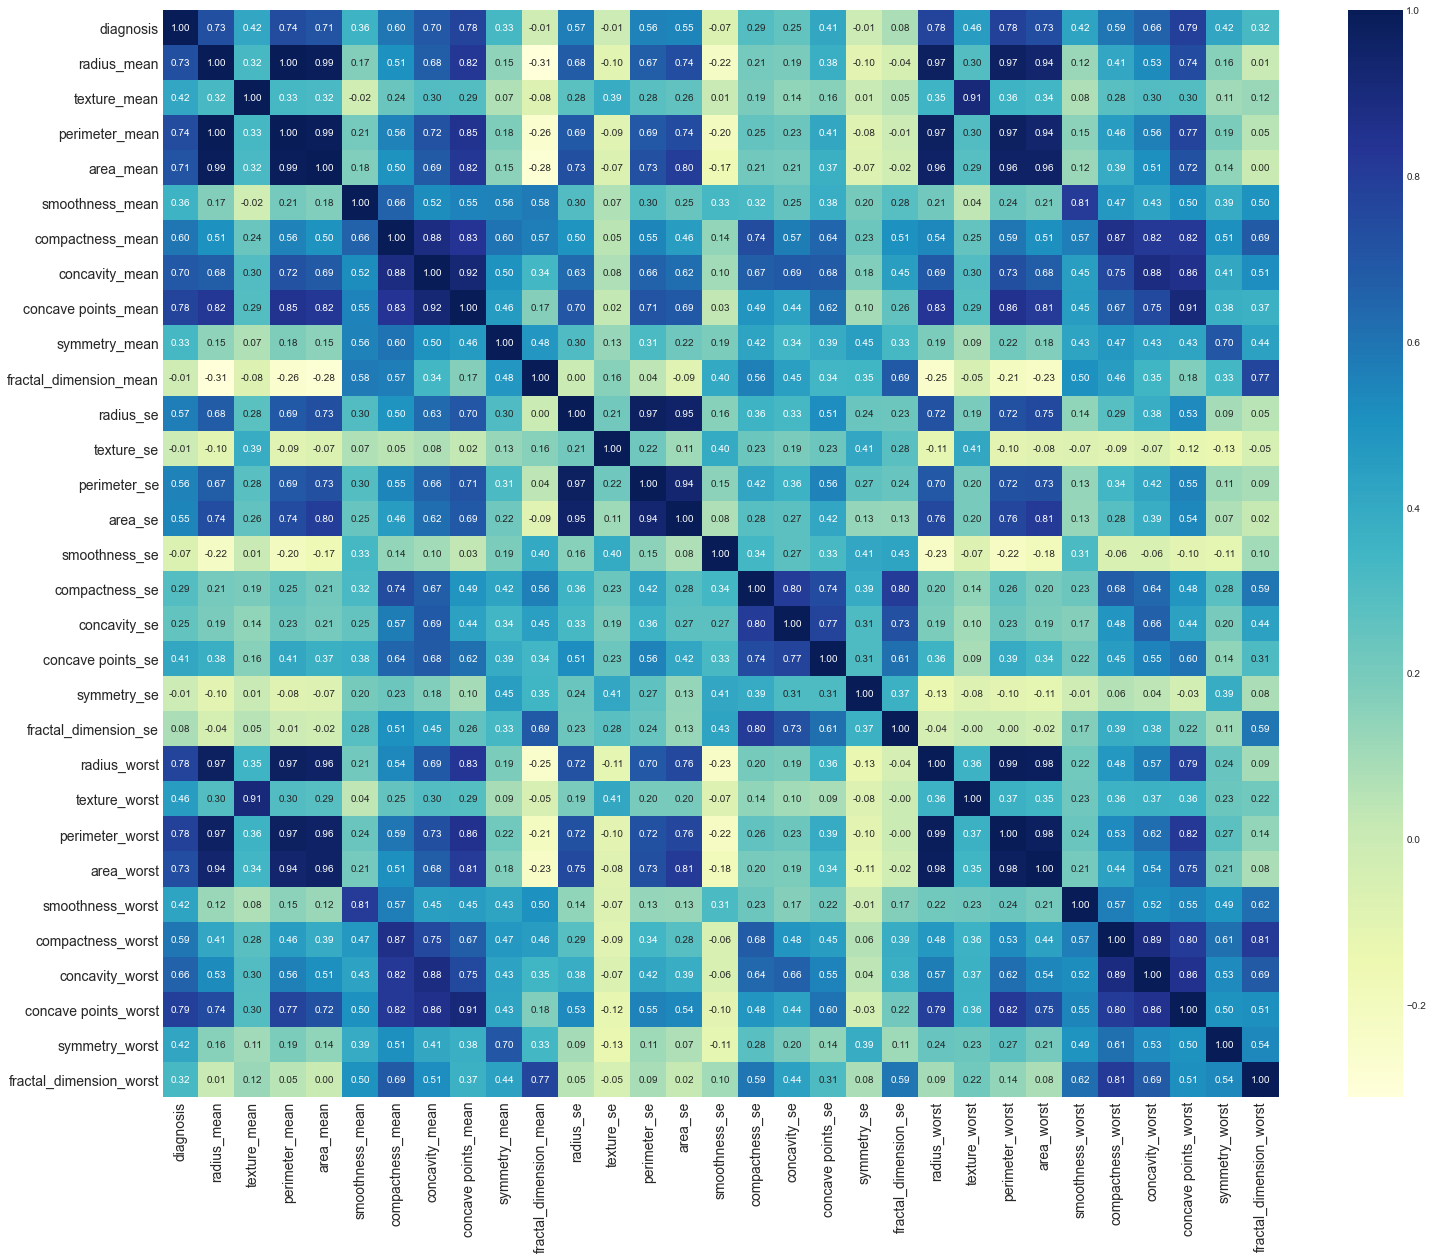

In [8]:
df = data_breast_cancer.copy()

# converting to ones and zeros
df['diagnosis'] = data_breast_cancer["diagnosis"].replace({"M": 1, "B": 0})

# create a correlation matrix
correlation_matrix = df.corr()

# plot the matrix using seaborn heatmap
fig, ax = plt.subplots(figsize=(25,20))

sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='YlGnBu',
            ax=ax);

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

The correlation matrix reflects the relationship between two variables. When considering the **top row** or **first column** - `diagnosis`, some strong positive correlations can be observed. 

The following features have the **strong** correlation coefficient with respect to `diagnosis`:
1. concave_points_mean: 0.78
2. perimeter_mean: 0.74
3. radius_mean: 0.73
4. area_mean: 0.71
5. concavity_mean: 0.70

The strength of relationship is **moderate** for **compactness_mean: 0.60**

Some have a **weak** correlation with `diagnosis`:
1. texture_mean: 0.42
2. smoothness_mean: 0.36
3. symmetry_mean: 0.33

Finally, **fractal_dimension_mean** has a correlation coefficient of **-0.01** with `diagnosis`, which signifies no relation.

It should also be noted that all the `standard error` values of the features hold a low-moderate or weak correlation relationship with `diagnosis` and their respective `mean` and `worst` values.

On the other hand, `worst` values of each feature hold a **strong** correlation with their respective `mean` values. *Notice the diagnol line (bottom-left corner), running from `radius_worst` and `radius_mean` intersection to `fractal_dimension_worst` to `fractal_dimension_mean`.

We shall now start processing the data and determine the best estimator for the problem.

### 1.3 Processing Data

In [9]:
data_breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Split data into features (X) and labels (y)
X = data_breast_cancer.drop("diagnosis", axis=1)
y = data_breast_cancer["diagnosis"]

# Covert y into numerical data
y = y.replace({"M": 1, "B": 0})

In [11]:
# Apply MinMaxScaler to the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(569, 30)

In [12]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split

np.random.seed(100)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

## 2. Selecting, Fitting and Testing Model
Using the `sklearn ML map` the following algorithms should perform well on the data.
1. Support Vector Classifier (SVC)
2. KNeighbors Classifier
3. Random Forest Classiser *from ensemble methods*

### 2.1 Check performance on SVC model
Linear SVC is tested on first.

In [13]:
from sklearn.svm import SVC

# Instanciate model
clf_svc = SVC(kernel='linear', probability=True)

# train model
clf_svc.fit(X_train, y_train)

# Checking the accuracy of the model
print(f"Train accuracy: {clf_svc.score(X_train, y_train): .2%}")
print(f"Test accuracy: {clf_svc.score(X_test, y_test): .2%}")

Train accuracy:  98.24%
Test accuracy:  96.49%


The Linear SVC model performs really well with an accuracy of about **97%**.
The accuracies of KNeighbors and Random Forest algorithms are calculated to compare to Linear SVC model.

### 2.2 Check performance on KNeighbors and Random Forest Classifiers

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Instanciate models
clf_kn = KNeighborsClassifier()
clf_ran = RandomForestClassifier()

# Fit models
clf_kn.fit(X_train, y_train)
clf_ran.fit(X_train, y_train)

# Check the accuracy of the models
print("########## KNeighbors Classifier ##########")
print(f"Train accuracy: {clf_kn.score(X_train, y_train): .2%}")
print(f"Test accuracy: {clf_kn.score(X_test, y_test): .2%}\n")

print("########## Random Forest Classifier ##########")
print(f"Train accuracy: {clf_ran.score(X_train, y_train): .2%}")
print(f"Test accuracy: {clf_ran.score(X_test, y_test): .2%}")

########## KNeighbors Classifier ##########
Train accuracy:  97.80%
Test accuracy:  95.61%

########## Random Forest Classifier ##########
Train accuracy:  100.00%
Test accuracy:  96.49%


### 2.3 Better understand the performance of the three models. 

All the models have a similar accuracy score. Hence, to better understand the performance of the models, cross validation score of the following metrics are compared:
1. Accuracy
2. Precision
3. Recall
4. f1 socre
5. Confusion Matrix
6. ROC curve

In [15]:
# Creating a function to plot the confusion matrix
import seaborn as sns

def plot_conf_mat(*all_conf_mat, **format_settings):
    """Plots the confusion matrix using Seaborn Heatmap.
    
    Args:
        all_conf_mat (args as ndarray or pandas dataframe): The confusion matrix generated using sklearn's method.
        format_settings (keywords arguements): 
            titles_list (list of str): Titles to be given to each of the plots.
            cmaps_list (list of str): cmap value to decide the color for each of the plots 
                                     (refer to Matplotlib for possible values).
            num_of_rows (int): number of rows of the plots.
            num_of_cols (int): number of columns of the plots.
        
    Returns: None
    """
    num_of_plots = len(all_conf_mat)
    num_of_rows, num_of_cols = get_ideal_plot_dim(num_of_plots)

    all_titles = format_settings.get("titles_list", ["Confusion Matrix"]*num_of_plots)
    all_cmaps = format_settings.get("cmaps_list", ['Blues']*num_of_plots)
    nrows = format_settings.get("nrows", num_of_rows)
    ncols = format_settings.get("ncols", num_of_cols)
    
    fig, axes = plt.subplots(nrows=nrows,
                             ncols=ncols,
                             figsize=(12, 4))
    
    for ax, conf_mat, title, cmap in zip(axes, all_conf_mat, all_titles, all_cmaps):
        sns.heatmap(conf_mat, 
                    annot=True,
                    annot_kws={'size': 14},
                    cbar=False,
                    cmap=cmap,
                    ax=ax)

        ax.set_title(title, fontdict={'size': 16, 'weight': 'bold'}, pad=30)
        ax.set_xlabel('Predicted Label', fontdict={'size': 14, 'weight': 'bold'}, labelpad=20)
        ax.set_ylabel('True Label', fontdict={'size': 14, 'weight': 'bold'}, labelpad=20)
        
        loc_x = ax.get_xticks()
        loc_y = ax.get_yticks()
        loc_y -= 0.3

        ax.set_xticklabels(['Benign', 'Malignant'], fontdict={"fontsize": 14})
        ax.set_yticks(loc_y)
        ax.set_yticklabels(['Benign', 'Malignant'], fontdict={"fontsize": 14}, rotation=90)
        
    plt.tight_layout(rect=[0, 0.03, 1.1, 0.97])

In [16]:
def get_ideal_plot_dim(total_plots):
    """Calculated the best number of rows and columns to create plots clearly.
    
    Args:
        total_plots (int): Total number of plots to be created.
    
    Returns:
        nrows (int): Number of rows to be plot.
        ncols (int): Number of columns to be plot.
    """
    nrows = 1
    ncols = 3
    if total_plots <= 3:
        ncols = total_plots
        return nrows, ncols
    else:
        nrows = round(total_plots / 3) + 2
        return nrows, ncols

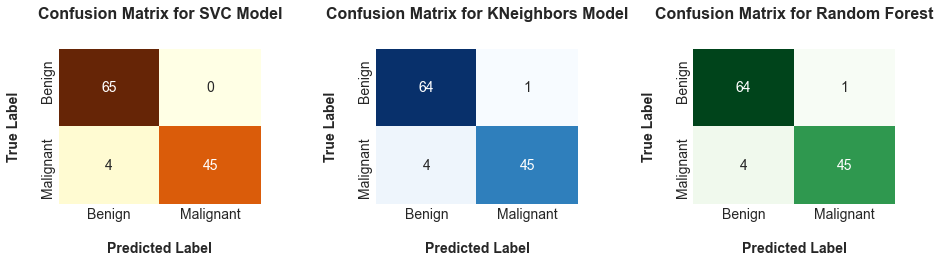

In [17]:
from sklearn.metrics import confusion_matrix

np.random.seed(100)

clf_svc.fit(X_train, y_train)
clf_kn.fit(X_train, y_train)
clf_ran.fit(X_train, y_train)

conf_mat_svc = confusion_matrix(y_test, clf_svc.predict(X_test))
conf_mat_kn = confusion_matrix(y_test, clf_kn.predict(X_test))
conf_mat_ran = confusion_matrix(y_test, clf_ran.predict(X_test))

titles = ["Confusion Matrix for SVC Model", 
          "Confusion Matrix for KNeighbors Model", 
          "Confusion Matrix for Random Forest"]

cmaps = ['YlOrBr',
         'Blues',
         'Greens']

plot_conf_mat(conf_mat_svc, conf_mat_kn, conf_mat_ran, titles_list=titles, cmaps_list=cmaps)

Looking at the confusion matrices of the three models, it is clear that they all perform equally well on the specific test-train data split. However, the cross validated scores of other metrics on the three models can give a better idea of the models perform.

In [18]:
# Creating a function to print accuracy, precision, recall and f1 scores
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X, y, print_results=True):
    """The function evalutes the model on six metrics using cross validation scores for each.
    The six metrics are:
    1. Accuracy
    2. Precision
    3. Recall
    4. f1 score
    5. Modified Brier score = (neg_brier_score + 1)
    6. Area under the ROC curve
    
    
    Notes:
        The higher the value of the metric, the better. 
        Therefore, the Brier score is taken as a negative value. Furthermore, to make Brier score easier to 
        compare to other metrics, a constant value of `1` is added to the `neg_brier_score`. 
    
    Args:
        model (object): An instantiated object of a sklearn classifier.
        X (ndarray or pandas dataframe): Contains the features from the dataset.
        y (ndarray or pandas dataframe): Contains the target or response varible from the dataset.
        print_results (bool): Prints the metric scores if true.
    
    Returns:
        performance_dict (dict): A dictionary containing the four performance metrics.
    """
    # Setting up random seed to ensure all models are evaluated on same data splits
    np.random.seed(100)
    
    # Creating a list of metrics
    metrics_list = ['accuracy', 'precision', 'recall', 'f1', 'neg_brier_score', 'roc_auc']
    performance_dict = {}
      
    for metric in metrics_list:
        metric_score = cross_val_score(model, X, y, cv=5, scoring=metric)
        performance_dict.update({metric: metric_score.mean()})
    
    # Modify neg_brier_score to better compare the value with other metrics.
    performance_dict.update({"modified_brier_score": performance_dict.get("neg_brier_score") + 1})
    performance_dict.pop("neg_brier_score")
    
    # Displaying Results
    if print_results:
        print("######### Averaged Cross Validation Scores ##########\n"
              "Accuracy score:       {accuracy: .2%}\n"
              "Precision score:      {precision: 0.2%}\n"
              "Recall score:         {recall: 0.2%}\n"
              "F1 score:             {f1: 0.2%}\n"
              "Modified Brier score: {modified_brier_score: 0.3f}\n"
              "ROC Area Under Curve: {roc_auc: .3f}".format(**performance_dict))
    
    # Print statement to know completion, incase of function being called multiple times in a cell.
    print("Model evaluation complete.") 
    
    return performance_dict

In [19]:
evaluate_model(clf_svc, X_scaled, y)

######### Averaged Cross Validation Scores ##########
Accuracy score:        97.54%
Precision score:       98.54%
Recall score:          94.82%
F1 score:              96.63%
Modified Brier score:  0.978
ROC Area Under Curve:  0.994
Model evaluation complete.


{'accuracy': 0.9754075454122031,
 'precision': 0.9853600464576073,
 'recall': 0.9481727574750831,
 'f1': 0.9663182346109176,
 'roc_auc': 0.9938712160993524,
 'modified_brier_score': 0.9777594872194063}

Model evaluation complete.
Model evaluation complete.
Model evaluation complete.


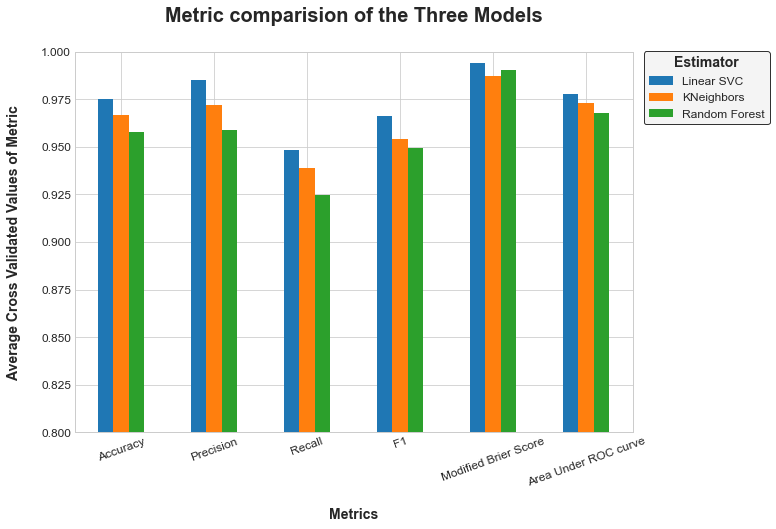

In [20]:
# Setting seed to ensure reproducability
np.random.seed(100)

# Getting Metric scores on each model
eval_svc = evaluate_model(clf_svc, X_scaled, y, False)
eval_kn = evaluate_model(clf_kn, X_scaled, y, False)
eval_ran = evaluate_model(clf_ran, X, y, False)

# Plotting the data obtained
df = pd.DataFrame({'Linear SVC': eval_svc,
                   'KNeighbors': eval_kn,
                   'Random Forest': eval_ran})

# Instantiating figure
fig, ax = plt.subplots(figsize=(10,7))

# plotting data
df.plot.bar(ax=ax)

# Formatting title and axes
ax.set_title("Metric comparision of the Three Models", 
             fontdict={"fontsize":20, "fontweight":'bold'},
             pad=30)

ax.set_xlabel("Metrics", fontsize=14, fontweight='bold', labelpad=20)
ax.set_ylabel("Average Cross Validated Values of Metric", 
              fontsize=14, fontweight='bold', labelpad=20)

locs, labels = plt.xticks()
plt.xticks(locs, ['Accuracy', 'Precision', 'Recall', 'F1', 'Modified Brier Score', 'Area Under ROC curve'], 
           fontsize=12, rotation=20)
plt.yticks(fontsize=12)
ax.set_ylim([0.8, 1])

# Formatting legend
leg = ax.legend(fontsize=12, loc=(1.02, 0.81), frameon=True)
leg.get_frame().set_color("#F2F2F2")
leg.get_frame().set_edgecolor("#000000")
leg.set_title("Estimator", prop={"size": 14, "weight": 'bold'})

Though all the models performed well on the data, the `Linear SVC` model has the **best performance on all the metrics**. 

*(The y-axis limits of the graph made it seem like the difference in performance is larger than it is in reality.)*

In [21]:
# Saving the baseline model with default hyperparameters
baseline_metrics = df["Linear SVC"]
baseline_metrics

accuracy                0.975408
precision               0.985360
recall                  0.948173
f1                      0.966318
roc_auc                 0.993871
modified_brier_score    0.977759
Name: Linear SVC, dtype: float64

## 3. Improving Model Performance (Tuning Hyperparameters)
In this section, a simple two-step process is used to tune and determine the best hyperparameters: 
1. Determine the parameters to be modified - research and prepare data.
2. `GridSearchCV` - select specific values to carry out tests on.

*Note: the method employed can only be used because a linear model is chosen. Ideally, if the model is more complex, `RandomizedSearchCV` is used to narrow down the scope of hyperparameters and then `GridSearchCV` is used. This is done to ensure lower computational power is needed. Hence, usage of `LinearSVC` model allows us to better tune the hyperparameters by using making use of lower computational power.*

### 3.1 Best Hyperparameters to Tune
After going through the documentation of the `LinearSVC` the following parameters are chosen:
1. `penalty`: {'I1', 'I2'}
2. `loss`: {'hinge', 'squared_hinge'}
3. `dual`: **True** or **False**
4. `C`: values > 0 

The only set of test values to be defined is for `C`.
A graph is used to visualise the effect of different values of `C` on the accuracy of the model. 
This graph is used to understand what values of `C` are to be used in `GridSearchCV`

In [20]:
# Creating the data for the graph
from sklearn.metrics import accuracy_score

# Set seed.
np.random.seed(100)

# Creating a ndarray containing 1000 different values.
c_values = list(np.linspace(10**-3, 10**3, 100))
accuracy_values = []

# Loop to calculate accuracy scores.
for c in c_values:
    model = SVC(kernel='linear', C=c)
#     .fit(X_train, y_train)
#     y_preds = model.predict(X_test)
    acc = cross_val_score(model, X_scaled, y)
    accuracy_values.append(acc.mean())
len(c_values), len(accuracy_values)

(100, 100)

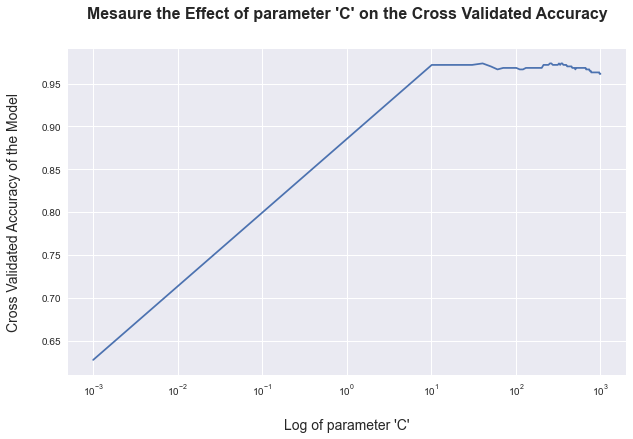

In [21]:
plt.style.use('seaborn')

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(c_values, accuracy_values)
ax.set_xscale('log')
ax.set_title("Mesaure the Effect of parameter 'C' on the Cross Validated Accuracy",
             fontdict={'size': 16, 'weight': 'bold'},
             pad=30)
ax.set_xlabel("Log of parameter 'C'",
              fontdict={'size': 14},
              labelpad=20)
ax.set_ylabel("Cross Validated Accuracy of the Model",
              fontdict={'size': 14},
              labelpad=20);

From the above graph it can be concluded that the best values for `C` lies between 10 and 100. There is a small peak around the value of 500 as well. Hence the grid to be input for `GridSearchCV` can now be created.

In [22]:
grid =  {'loss' : ['hinge', 'squared_hinge'],
         'dual' : [True, False],
         'tol' : [10**-4, 10**-5, 10**-6],
         'C': [10, 20, 50, 100, 500]}

In [23]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import LinearSVC

# Set seed
np.random.seed(69)

# Create train, test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

# Create model
clf = LinearSVC(max_iter=10000)

# Setup GridSearchCV
clf_gs = GridSearchCV(estimator=clf,
                      param_grid=grid,
                      cv=5,
                      verbose=2)
clf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=10, dual=True, loss=hinge, tol=0.0001 .........................
[CV] .......... C=10, dual=True, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=10, dual=True, loss=hinge, tol=0.0001 .........................
[CV] .......... C=10, dual=True, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=10, dual=True, loss=hinge, tol=0.0001 .........................
[CV] .......... C=10, dual=True, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=10, dual=True, loss=hinge, tol=0.0001 .........................
[CV] .......... C=10, dual=True, loss=hinge, tol=0.0001, total=   0.1s
[CV] C=10, dual=True, loss=hinge, tol=0.0001 .........................
[CV] .......... C=10, dual=True, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=10, dual=True, loss=hinge, tol=1e-05 ..........................
[CV] ........... C=10, dual=True, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=10, dual=True, loss=hinge, tol=1e-05 ..........................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........... C=10, dual=True, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=10, dual=True, loss=hinge, tol=1e-05 ..........................
[CV] ........... C=10, dual=True, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=10, dual=True, loss=hinge, tol=1e-06 ..........................
[CV] ........... C=10, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=10, dual=True, loss=hinge, tol=1e-06 ..........................
[CV] ........... C=10, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=10, dual=True, loss=hinge, tol=1e-06 ..........................
[CV] ........... C=10, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=10, dual=True, loss=hinge, tol=1e-06 ..........................
[CV] ........... C=10, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=10, dual=True, loss=hinge, tol=1e-06 ..........................
[CV] ........... C=10, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=10, dual=True, loss=squared_hinge, tol=0.0001 .................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .. C=10, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=10, dual=True, loss=squared_hinge, tol=0.0001 .................
[CV] .. C=10, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=10, dual=True, loss=squared_hinge, tol=0.0001 .................
[CV] .. C=10, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=10, dual=True, loss=squared_hinge, tol=1e-05 ..................
[CV] ... C=10, dual=True, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=10, dual=True, loss=squared_hinge, tol=1e-05 ..................
[CV] ... C=10, dual=True, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=10, dual=True, loss=squared_hinge, tol=1e-05 ..................
[CV] ... C=10, dual=True, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=10, dual=True, loss=squared_hinge, tol=1e-05 ..................
[CV] ... C=10, dual=True, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=10, dual=True, loss=squared_hinge, tol=1e-05 ..................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)

[CV] ......... C=10, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=10, dual=False, loss=hinge, tol=0.0001 ........................
[CV] ......... C=10, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=10, dual=False, loss=hinge, tol=0.0001 ........................
[CV] ......... C=10, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=10, dual=False, loss=hinge, tol=0.0001 ........................
[CV] ......... C=10, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=10, dual=False, loss=hinge, tol=1e-05 .........................
[CV] .......... C=10, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=10, dual=False, loss=hinge, tol=1e-05 .........................
[CV] .......... C=10, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=10, dual=False, loss=hinge, tol=1e-05 .........................
[CV] .......... C=10, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=10, dual=False, loss=hinge, tol=1e-05 .........................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, incre

[CV] ........... C=20, dual=True, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=20, dual=True, loss=hinge, tol=1e-05 ..........................
[CV] ........... C=20, dual=True, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=20, dual=True, loss=hinge, tol=1e-05 ..........................
[CV] ........... C=20, dual=True, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=20, dual=True, loss=hinge, tol=1e-06 ..........................
[CV] ........... C=20, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=20, dual=True, loss=hinge, tol=1e-06 ..........................
[CV] ........... C=20, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=20, dual=True, loss=hinge, tol=1e-06 ..........................
[CV] ........... C=20, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=20, dual=True, loss=hinge, tol=1e-06 ..........................


/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ........... C=20, dual=True, loss=hinge, tol=1e-06, total=   0.1s
[CV] C=20, dual=True, loss=hinge, tol=1e-06 ..........................
[CV] ........... C=20, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=20, dual=True, loss=squared_hinge, tol=0.0001 .................
[CV] .. C=20, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=20, dual=True, loss=squared_hinge, tol=0.0001 .................
[CV] .. C=20, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=20, dual=True, loss=squared_hinge, tol=0.0001 .................
[CV] .. C=20, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=20, dual=True, loss=squared_hinge, tol=0.0001 .................
[CV] .. C=20, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=20, dual=True, loss=squared_hinge, tol=0.0001 .................
[CV] .. C=20, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=20, dual=True, loss=squared_hinge, tol=1e-05 ..................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)

[CV] .......... C=50, dual=True, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=50, dual=True, loss=hinge, tol=0.0001 .........................
[CV] .......... C=50, dual=True, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=50, dual=True, loss=hinge, tol=0.0001 .........................
[CV] .......... C=50, dual=True, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=50, dual=True, loss=hinge, tol=0.0001 .........................
[CV] .......... C=50, dual=True, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=50, dual=True, loss=hinge, tol=0.0001 .........................
[CV] .......... C=50, dual=True, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=50, dual=True, loss=hinge, tol=1e-05 ..........................
[CV] ........... C=50, dual=True, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=50, dual=True, loss=hinge, tol=1e-05 ..........................
[CV] ........... C=50, dual=True, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=50, dual=True, loss=hinge, tol=1e-05 ..........................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ........... C=50, dual=True, loss=hinge, tol=1e-05, total=   0.1s
[CV] C=50, dual=True, loss=hinge, tol=1e-06 ..........................
[CV] ........... C=50, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=50, dual=True, loss=hinge, tol=1e-06 ..........................
[CV] ........... C=50, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=50, dual=True, loss=hinge, tol=1e-06 ..........................
[CV] ........... C=50, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=50, dual=True, loss=hinge, tol=1e-06 ..........................
[CV] ........... C=50, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=50, dual=True, loss=hinge, tol=1e-06 ..........................
[CV] ........... C=50, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=50, dual=True, loss=squared_hinge, tol=0.0001 .................
[CV] .. C=50, dual=True, loss=squared_hinge, tol=0.0001, total=   0.1s
[CV] C=50, dual=True, loss=squared_hinge, tol=0.0001 .................


/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .. C=50, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=50, dual=True, loss=squared_hinge, tol=0.0001 .................
[CV] .. C=50, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=50, dual=True, loss=squared_hinge, tol=0.0001 .................
[CV] .. C=50, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=50, dual=True, loss=squared_hinge, tol=0.0001 .................
[CV] .. C=50, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=50, dual=True, loss=squared_hinge, tol=1e-05 ..................
[CV] ... C=50, dual=True, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=50, dual=True, loss=squared_hinge, tol=1e-05 ..................
[CV] ... C=50, dual=True, loss=squared_hinge, tol=1e-05, total=   0.1s
[CV] C=50, dual=True, loss=squared_hinge, tol=1e-05 ..................
[CV] ... C=50, dual=True, loss=squared_hinge, tol=1e-05, total=   0.1s
[CV] C=50, dual=True, loss=squared_hinge, tol=1e-05 ..................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)

[CV] .. C=50, dual=False, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=50, dual=False, loss=squared_hinge, tol=1e-05 .................
[CV] .. C=50, dual=False, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=50, dual=False, loss=squared_hinge, tol=1e-05 .................
[CV] .. C=50, dual=False, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=50, dual=False, loss=squared_hinge, tol=1e-05 .................
[CV] .. C=50, dual=False, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=50, dual=False, loss=squared_hinge, tol=1e-06 .................
[CV] .. C=50, dual=False, loss=squared_hinge, tol=1e-06, total=   0.0s
[CV] C=50, dual=False, loss=squared_hinge, tol=1e-06 .................
[CV] .. C=50, dual=False, loss=squared_hinge, tol=1e-06, total=   0.0s
[CV] C=50, dual=False, loss=squared_hinge, tol=1e-06 .................
[CV] .. C=50, dual=False, loss=squared_hinge, tol=1e-06, total=   0.0s
[CV] C=50, dual=False, loss=squared_hinge, tol=1e-06 .................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, incre

[CV] ......... C=100, dual=True, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=100, dual=True, loss=hinge, tol=0.0001 ........................
[CV] ......... C=100, dual=True, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=100, dual=True, loss=hinge, tol=1e-05 .........................
[CV] .......... C=100, dual=True, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=100, dual=True, loss=hinge, tol=1e-05 .........................
[CV] .......... C=100, dual=True, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=100, dual=True, loss=hinge, tol=1e-05 .........................
[CV] .......... C=100, dual=True, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=100, dual=True, loss=hinge, tol=1e-05 .........................


/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, incre

[CV] .......... C=100, dual=True, loss=hinge, tol=1e-05, total=   0.1s
[CV] C=100, dual=True, loss=hinge, tol=1e-05 .........................
[CV] .......... C=100, dual=True, loss=hinge, tol=1e-05, total=   0.1s
[CV] C=100, dual=True, loss=hinge, tol=1e-06 .........................
[CV] .......... C=100, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=100, dual=True, loss=hinge, tol=1e-06 .........................
[CV] .......... C=100, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=100, dual=True, loss=hinge, tol=1e-06 .........................
[CV] .......... C=100, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=100, dual=True, loss=hinge, tol=1e-06 .........................
[CV] .......... C=100, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=100, dual=True, loss=hinge, tol=1e-06 .........................
[CV] .......... C=100, dual=True, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=100, dual=True, loss=squared_hinge, tol=0.0001 ................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, incre

[CV] . C=100, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=100, dual=True, loss=squared_hinge, tol=0.0001 ................
[CV] . C=100, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=100, dual=True, loss=squared_hinge, tol=0.0001 ................
[CV] . C=100, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=100, dual=True, loss=squared_hinge, tol=0.0001 ................
[CV] . C=100, dual=True, loss=squared_hinge, tol=0.0001, total=   0.1s
[CV] C=100, dual=True, loss=squared_hinge, tol=1e-05 .................
[CV] .. C=100, dual=True, loss=squared_hinge, tol=1e-05, total=   0.1s
[CV] C=100, dual=True, loss=squared_hinge, tol=1e-05 .................


/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .. C=100, dual=True, loss=squared_hinge, tol=1e-05, total=   0.1s
[CV] C=100, dual=True, loss=squared_hinge, tol=1e-05 .................
[CV] .. C=100, dual=True, loss=squared_hinge, tol=1e-05, total=   0.1s
[CV] C=100, dual=True, loss=squared_hinge, tol=1e-05 .................
[CV] .. C=100, dual=True, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=100, dual=True, loss=squared_hinge, tol=1e-05 .................
[CV] .. C=100, dual=True, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=100, dual=True, loss=squared_hinge, tol=1e-06 .................
[CV] .. C=100, dual=True, loss=squared_hinge, tol=1e-06, total=   0.0s
[CV] C=100, dual=True, loss=squared_hinge, tol=1e-06 .................


/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .. C=100, dual=True, loss=squared_hinge, tol=1e-06, total=   0.0s
[CV] C=100, dual=True, loss=squared_hinge, tol=1e-06 .................
[CV] .. C=100, dual=True, loss=squared_hinge, tol=1e-06, total=   0.0s
[CV] C=100, dual=True, loss=squared_hinge, tol=1e-06 .................
[CV] .. C=100, dual=True, loss=squared_hinge, tol=1e-06, total=   0.1s
[CV] C=100, dual=True, loss=squared_hinge, tol=1e-06 .................


/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_,

[CV] .. C=100, dual=True, loss=squared_hinge, tol=1e-06, total=   0.1s
[CV] C=100, dual=False, loss=hinge, tol=0.0001 .......................
[CV] ........ C=100, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=100, dual=False, loss=hinge, tol=0.0001 .......................
[CV] ........ C=100, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=100, dual=False, loss=hinge, tol=0.0001 .......................
[CV] ........ C=100, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=100, dual=False, loss=hinge, tol=0.0001 .......................
[CV] ........ C=100, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=100, dual=False, loss=hinge, tol=0.0001 .......................
[CV] ........ C=100, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=100, dual=False, loss=hinge, tol=1e-05 ........................
[CV] ......... C=100, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=100, dual=False, loss=hinge, tol=1e-05 ........................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, incre

[CV] ......... C=500, dual=True, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=500, dual=True, loss=hinge, tol=0.0001 ........................
[CV] ......... C=500, dual=True, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=500, dual=True, loss=hinge, tol=1e-05 .........................
[CV] .......... C=500, dual=True, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, tol=1e-05 .........................
[CV] .......... C=500, dual=True, loss=hinge, tol=1e-05, total=   0.1s
[CV] C=500, dual=True, loss=hinge, tol=1e-05 .........................
[CV] .......... C=500, dual=True, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, tol=1e-05 .........................


/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .......... C=500, dual=True, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, tol=1e-05 .........................
[CV] .......... C=500, dual=True, loss=hinge, tol=1e-05, total=   0.1s
[CV] C=500, dual=True, loss=hinge, tol=1e-06 .........................
[CV] .......... C=500, dual=True, loss=hinge, tol=1e-06, total=   0.1s
[CV] C=500, dual=True, loss=hinge, tol=1e-06 .........................


/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, incre

[CV] .......... C=500, dual=True, loss=hinge, tol=1e-06, total=   0.1s
[CV] C=500, dual=True, loss=hinge, tol=1e-06 .........................
[CV] .......... C=500, dual=True, loss=hinge, tol=1e-06, total=   0.1s
[CV] C=500, dual=True, loss=hinge, tol=1e-06 .........................
[CV] .......... C=500, dual=True, loss=hinge, tol=1e-06, total=   0.1s
[CV] C=500, dual=True, loss=hinge, tol=1e-06 .........................
[CV] .......... C=500, dual=True, loss=hinge, tol=1e-06, total=   0.1s
[CV] C=500, dual=True, loss=squared_hinge, tol=0.0001 ................


/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, incre

[CV] . C=500, dual=True, loss=squared_hinge, tol=0.0001, total=   0.1s
[CV] C=500, dual=True, loss=squared_hinge, tol=0.0001 ................
[CV] . C=500, dual=True, loss=squared_hinge, tol=0.0001, total=   0.1s
[CV] C=500, dual=True, loss=squared_hinge, tol=0.0001 ................
[CV] . C=500, dual=True, loss=squared_hinge, tol=0.0001, total=   0.1s
[CV] C=500, dual=True, loss=squared_hinge, tol=0.0001 ................
[CV] . C=500, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, tol=0.0001 ................


/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, incre

[CV] . C=500, dual=True, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, tol=1e-05 .................
[CV] .. C=500, dual=True, loss=squared_hinge, tol=1e-05, total=   0.1s
[CV] C=500, dual=True, loss=squared_hinge, tol=1e-05 .................
[CV] .. C=500, dual=True, loss=squared_hinge, tol=1e-05, total=   0.1s
[CV] C=500, dual=True, loss=squared_hinge, tol=1e-05 .................


/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, incre

[CV] .. C=500, dual=True, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, tol=1e-05 .................
[CV] .. C=500, dual=True, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, tol=1e-05 .................
[CV] .. C=500, dual=True, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, tol=1e-06 .................
[CV] .. C=500, dual=True, loss=squared_hinge, tol=1e-06, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, tol=1e-06 .................
[CV] .. C=500, dual=True, loss=squared_hinge, tol=1e-06, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, tol=1e-06 .................
[CV] .. C=500, dual=True, loss=squared_hinge, tol=1e-06, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, tol=1e-06 .................
[CV] .. C=500, dual=True, loss=squared_hinge, tol=1e-06, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, tol=1e-06 .................


/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_,

[CV] .. C=500, dual=True, loss=squared_hinge, tol=1e-06, total=   0.1s
[CV] C=500, dual=False, loss=hinge, tol=0.0001 .......................
[CV] ........ C=500, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=500, dual=False, loss=hinge, tol=0.0001 .......................
[CV] ........ C=500, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=500, dual=False, loss=hinge, tol=0.0001 .......................
[CV] ........ C=500, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=500, dual=False, loss=hinge, tol=0.0001 .......................
[CV] ........ C=500, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=500, dual=False, loss=hinge, tol=0.0001 .......................
[CV] ........ C=500, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=500, dual=False, loss=hinge, tol=1e-05 ........................
[CV] ......... C=500, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=hinge, tol=1e-05 ........................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.8s finished


GridSearchCV(cv=5, estimator=LinearSVC(max_iter=10000),
             param_grid={'C': [10, 20, 50, 100, 500], 'dual': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'tol': [0.0001, 1e-05, 1e-06]},
             verbose=2)

In [24]:
clf_gs.best_params_

{'C': 10, 'dual': True, 'loss': 'hinge', 'tol': 0.0001}

In [25]:
grid_2 =  {'loss' : ['hinge', 'squared_hinge'],
         'dual' : [False],
         'tol' : [10**-4, 5 * 10**-5, 10**-5, 10**-6],
         'C': [5, 10, 15, 20, 50, 100, 150, 200, 300, 500]}

In [26]:
# Setup GridSearchCV
clf_gs_2 = GridSearchCV(estimator=clf,
                        param_grid=grid_2,
                        cv=5,
                        verbose=2)

clf_gs_2.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] C=5, dual=False, loss=hinge, tol=0.0001 .........................
[CV] .......... C=5, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=5, dual=False, loss=hinge, tol=0.0001 .........................
[CV] .......... C=5, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=5, dual=False, loss=hinge, tol=0.0001 .........................
[CV] .......... C=5, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=5, dual=False, loss=hinge, tol=0.0001 .........................
[CV] .......... C=5, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=5, dual=False, loss=hinge, tol=0.0001 .........................
[CV] .......... C=5, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=5, dual=False, loss=hinge, tol=5e-05 ..........................
[CV] ........... C=5, dual=False, loss=hinge, tol=5e-05, total=   0.0s
[CV] C=5, dual=False, loss=hinge, tol=5e-05 ..........................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_libline

[CV] C=5, dual=False, loss=hinge, tol=5e-05 ..........................
[CV] ........... C=5, dual=False, loss=hinge, tol=5e-05, total=   0.0s
[CV] C=5, dual=False, loss=hinge, tol=1e-05 ..........................
[CV] ........... C=5, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=5, dual=False, loss=hinge, tol=1e-05 ..........................
[CV] ........... C=5, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=5, dual=False, loss=hinge, tol=1e-05 ..........................
[CV] ........... C=5, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=5, dual=False, loss=hinge, tol=1e-05 ..........................
[CV] ........... C=5, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=5, dual=False, loss=hinge, tol=1e-05 ..........................
[CV] ........... C=5, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=5, dual=False, loss=hinge, tol=1e-06 ..........................
[CV] ........... C=5, dual=False, loss=hinge, tol=1e-06, total=   0.0s
[CV] C

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)

[CV] ... C=5, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=5, dual=False, loss=squared_hinge, tol=5e-05 ..................
[CV] ... C=5, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=5, dual=False, loss=squared_hinge, tol=5e-05 ..................
[CV] ... C=5, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=5, dual=False, loss=squared_hinge, tol=5e-05 ..................
[CV] ... C=5, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=5, dual=False, loss=squared_hinge, tol=1e-05 ..................
[CV] ... C=5, dual=False, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=5, dual=False, loss=squared_hinge, tol=1e-05 ..................
[CV] ... C=5, dual=False, loss=squared_hinge, tol=1e-05, total=   0.1s
[CV] C=5, dual=False, loss=squared_hinge, tol=1e-05 ..................
[CV] ... C=5, dual=False, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=5, dual=False, loss=squared_hinge, tol=1e-05 ..................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)

[CV] C=10, dual=False, loss=hinge, tol=5e-05 .........................
[CV] .......... C=10, dual=False, loss=hinge, tol=5e-05, total=   0.0s
[CV] C=10, dual=False, loss=hinge, tol=1e-05 .........................
[CV] .......... C=10, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=10, dual=False, loss=hinge, tol=1e-05 .........................
[CV] .......... C=10, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=10, dual=False, loss=hinge, tol=1e-05 .........................
[CV] .......... C=10, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=10, dual=False, loss=hinge, tol=1e-05 .........................
[CV] .......... C=10, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=10, dual=False, loss=hinge, tol=1e-05 .........................
[CV] .......... C=10, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=10, dual=False, loss=hinge, tol=1e-06 .........................
[CV] .......... C=10, dual=False, loss=hinge, tol=1e-06, total=   0.0s
[CV] C

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)


[CV] . C=10, dual=False, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=10, dual=False, loss=squared_hinge, tol=0.0001 ................
[CV] . C=10, dual=False, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=10, dual=False, loss=squared_hinge, tol=0.0001 ................
[CV] . C=10, dual=False, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=10, dual=False, loss=squared_hinge, tol=0.0001 ................
[CV] . C=10, dual=False, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=10, dual=False, loss=squared_hinge, tol=5e-05 .................
[CV] .. C=10, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=10, dual=False, loss=squared_hinge, tol=5e-05 .................
[CV] .. C=10, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=10, dual=False, loss=squared_hinge, tol=5e-05 .................
[CV] .. C=10, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=10, dual=False, loss=squared_hinge, tol=5e-05 .................
[CV] 

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)

[CV] .......... C=15, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=15, dual=False, loss=hinge, tol=1e-05 .........................
[CV] .......... C=15, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=15, dual=False, loss=hinge, tol=1e-06 .........................
[CV] .......... C=15, dual=False, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=15, dual=False, loss=hinge, tol=1e-06 .........................
[CV] .......... C=15, dual=False, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=15, dual=False, loss=hinge, tol=1e-06 .........................
[CV] .......... C=15, dual=False, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=15, dual=False, loss=hinge, tol=1e-06 .........................
[CV] .......... C=15, dual=False, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=15, dual=False, loss=hinge, tol=1e-06 .........................
[CV] .......... C=15, dual=False, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=15, dual=False, loss=squared_hinge, tol=0.0001 ................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)

[CV] ......... C=20, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=20, dual=False, loss=hinge, tol=0.0001 ........................
[CV] ......... C=20, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=20, dual=False, loss=hinge, tol=0.0001 ........................
[CV] ......... C=20, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=20, dual=False, loss=hinge, tol=5e-05 .........................
[CV] .......... C=20, dual=False, loss=hinge, tol=5e-05, total=   0.0s
[CV] C=20, dual=False, loss=hinge, tol=5e-05 .........................
[CV] .......... C=20, dual=False, loss=hinge, tol=5e-05, total=   0.0s
[CV] C=20, dual=False, loss=hinge, tol=5e-05 .........................
[CV] .......... C=20, dual=False, loss=hinge, tol=5e-05, total=   0.0s
[CV] C=20, dual=False, loss=hinge, tol=5e-05 .........................
[CV] .......... C=20, dual=False, loss=hinge, tol=5e-05, total=   0.0s
[CV] C=20, dual=False, loss=hinge, tol=5e-05 .........................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)

[CV] .......... C=50, dual=False, loss=hinge, tol=5e-05, total=   0.0s
[CV] C=50, dual=False, loss=hinge, tol=1e-05 .........................
[CV] .......... C=50, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=50, dual=False, loss=hinge, tol=1e-05 .........................
[CV] .......... C=50, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=50, dual=False, loss=hinge, tol=1e-05 .........................
[CV] .......... C=50, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=50, dual=False, loss=hinge, tol=1e-05 .........................
[CV] .......... C=50, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=50, dual=False, loss=hinge, tol=1e-05 .........................
[CV] .......... C=50, dual=False, loss=hinge, tol=1e-05, total=   0.0s
[CV] C=50, dual=False, loss=hinge, tol=1e-06 .........................
[CV] .......... C=50, dual=False, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=50, dual=False, loss=hinge, tol=1e-06 .........................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)

[CV] .. C=50, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=50, dual=False, loss=squared_hinge, tol=5e-05 .................
[CV] .. C=50, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=50, dual=False, loss=squared_hinge, tol=5e-05 .................
[CV] .. C=50, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=50, dual=False, loss=squared_hinge, tol=5e-05 .................
[CV] .. C=50, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=50, dual=False, loss=squared_hinge, tol=1e-05 .................
[CV] .. C=50, dual=False, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=50, dual=False, loss=squared_hinge, tol=1e-05 .................
[CV] .. C=50, dual=False, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=50, dual=False, loss=squared_hinge, tol=1e-05 .................
[CV] .. C=50, dual=False, loss=squared_hinge, tol=1e-05, total=   0.0s
[CV] C=50, dual=False, loss=squared_hinge, tol=1e-05 .................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)

[CV] ......... C=100, dual=False, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=100, dual=False, loss=hinge, tol=1e-06 ........................
[CV] ......... C=100, dual=False, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=100, dual=False, loss=hinge, tol=1e-06 ........................
[CV] ......... C=100, dual=False, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=100, dual=False, loss=hinge, tol=1e-06 ........................
[CV] ......... C=100, dual=False, loss=hinge, tol=1e-06, total=   0.0s
[CV] C=100, dual=False, loss=squared_hinge, tol=0.0001 ...............
[CV]  C=100, dual=False, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=100, dual=False, loss=squared_hinge, tol=0.0001 ...............
[CV]  C=100, dual=False, loss=squared_hinge, tol=0.0001, total=   0.1s
[CV] C=100, dual=False, loss=squared_hinge, tol=0.0001 ...............


/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)

[CV]  C=100, dual=False, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=100, dual=False, loss=squared_hinge, tol=0.0001 ...............
[CV]  C=100, dual=False, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=100, dual=False, loss=squared_hinge, tol=0.0001 ...............
[CV]  C=100, dual=False, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=100, dual=False, loss=squared_hinge, tol=5e-05 ................
[CV] . C=100, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=100, dual=False, loss=squared_hinge, tol=5e-05 ................
[CV] . C=100, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=100, dual=False, loss=squared_hinge, tol=5e-05 ................
[CV] . C=100, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=100, dual=False, loss=squared_hinge, tol=5e-05 ................
[CV] . C=100, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=100, dual=False, loss=squared_hinge, tol=5e-05 ................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)

[CV]  C=200, dual=False, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=200, dual=False, loss=squared_hinge, tol=0.0001 ...............
[CV]  C=200, dual=False, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=200, dual=False, loss=squared_hinge, tol=0.0001 ...............
[CV]  C=200, dual=False, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=200, dual=False, loss=squared_hinge, tol=0.0001 ...............
[CV]  C=200, dual=False, loss=squared_hinge, tol=0.0001, total=   0.0s
[CV] C=200, dual=False, loss=squared_hinge, tol=5e-05 ................
[CV] . C=200, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=200, dual=False, loss=squared_hinge, tol=5e-05 ................
[CV] . C=200, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=200, dual=False, loss=squared_hinge, tol=5e-05 ................
[CV] . C=200, dual=False, loss=squared_hinge, tol=5e-05, total=   0.0s
[CV] C=200, dual=False, loss=squared_hinge, tol=5e-05 ................
[CV] .

/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/raj/Documents/computer-science/machine-learning/ml-course-udemy/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)

[CV] . C=300, dual=False, loss=squared_hinge, tol=1e-06, total=   0.0s
[CV] C=300, dual=False, loss=squared_hinge, tol=1e-06 ................
[CV] . C=300, dual=False, loss=squared_hinge, tol=1e-06, total=   0.0s
[CV] C=300, dual=False, loss=squared_hinge, tol=1e-06 ................
[CV] . C=300, dual=False, loss=squared_hinge, tol=1e-06, total=   0.0s
[CV] C=300, dual=False, loss=squared_hinge, tol=1e-06 ................
[CV] . C=300, dual=False, loss=squared_hinge, tol=1e-06, total=   0.0s
[CV] C=300, dual=False, loss=squared_hinge, tol=1e-06 ................
[CV] . C=300, dual=False, loss=squared_hinge, tol=1e-06, total=   0.0s
[CV] C=500, dual=False, loss=hinge, tol=0.0001 .......................
[CV] ........ C=500, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=500, dual=False, loss=hinge, tol=0.0001 .......................
[CV] ........ C=500, dual=False, loss=hinge, tol=0.0001, total=   0.0s
[CV] C=500, dual=False, loss=hinge, tol=0.0001 .......................
[CV] .

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.9s finished


GridSearchCV(cv=5, estimator=LinearSVC(max_iter=10000),
             param_grid={'C': [5, 10, 15, 20, 50, 100, 150, 200, 300, 500],
                         'dual': [False], 'loss': ['hinge', 'squared_hinge'],
                         'tol': [0.0001, 5e-05, 1e-05, 1e-06]},
             verbose=2)

In [27]:
clf_gs_2.best_params_, clf_gs.best_params_

({'C': 10, 'dual': False, 'loss': 'squared_hinge', 'tol': 0.0001},
 {'C': 10, 'dual': True, 'loss': 'hinge', 'tol': 0.0001})

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def simple_evaluate_model(y_true, y_preds, print_results=True):
    """The function evalutes the model on four metrics using cross validation scores for each.
    The six metrics are:
    1. Accuracy
    2. Precision
    3. Recall
    4. f1 score
    
    Notes:
        The higher the value of the metric, the better. 
    
    Args:
        y_true (ndarray): contains the true values of the response from the dataset.
        y_preds (ndarray): contains the predicted values of response.
        print_results (bool): prints the metric scores if true.
    
    Returns:
        performance_dict (dict): A dictionary containing the four performance metrics.
    """
    # Setting up random seed to ensure all models are evaluated on same data splits
    np.random.seed(100)
    
    
    performance_dict = {'accuracy' : accuracy_score(y_true, y_preds),
                        'precision' : precision_score(y_true, y_preds),
                        'recall' : recall_score(y_true, y_preds),
                        'f1' : f1_score(y_true, y_preds)}
    
    # results
    if print_results:
        print("######### Metric Scores ##########\n"
              "Accuracy score:       {accuracy: .2%}\n"
              "Precision score:      {precision: 0.2%}\n"
              "Recall score:         {recall: 0.2%}\n"
              "F1 score:             {f1: 0.2%}\n".format(**performance_dict))
    
    return performance_dict

In [117]:
# Make predicitons
clf_svc = LinearSVC().fit(X_train, y_train)
y_preds_base = clf_svc.predict(X_test)
y_preds_gs = clf_gs.predict(X_test)
y_preds_gs_2 = clf_gs_2.predict(X_test)

# Evaluate models
models_df = pd.DataFrame({'Baseline Model' : simple_evaluate_model(y_test, y_preds_base),
                          'GridSearchCV Model 1' : simple_evaluate_model(y_test, y_preds_gs),
                          'GridSearchCV Model 2' : simple_evaluate_model(y_test, y_preds_gs_2)})

# Plot the metrics
fig, ax = plt.subplots()
models_df.plot.bar(ax=ax)

# legend formatting
leg = ax.legend(frameon=True)
leg.get_frame().set_color('#F2F2F2')
leg.get_frame().set_edgecolor('#000000')

NameError: name 'LinearSVC' is not defined

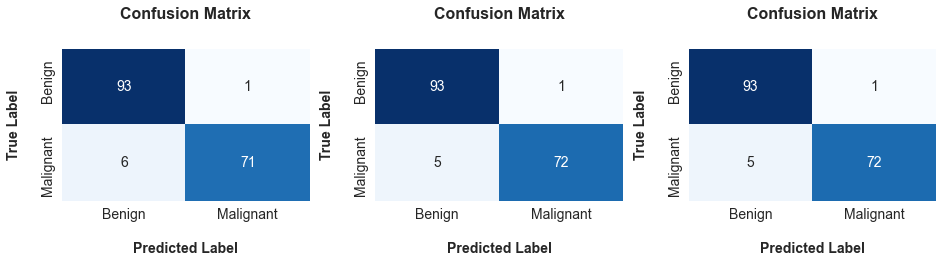

In [30]:
conf_mat_linear_svc = confusion_matrix(y_test, y_preds_base)
conf_mat_gs = confusion_matrix(y_test, y_preds_gs)
conf_mat_gs_2 = confusion_matrix(y_test, y_preds_gs_2)

plot_conf_mat(conf_mat_linear_svc, conf_mat_gs, conf_mat_gs_2)

## Analysis
Firstly, the `GridSearchCV` models with different hyperparameters have the exact same performance with the same metric results. However, according to the sklearn documentation of `LinearSVC` model, the ideal setting for the hyperparameter `dual` is **False**, when "*n_samples > n_features*". This is true for the WDBC dataset as `n_samples = 569` and `n_features = 30`. For any further analysis, the hyperparameters obtained through `clf_gs_2` will be used.


The model obtained with the `GridSearchCV` classifier is **96.49%**. When compared to the [best obtained accuracy](#Results) of **97.5%**, two points need to be underpinned:
1. The accuracies are very close, only a 1% difference between them.
2. The accuracy calculated above is on a specific data split, while the [best obtained accuracy](#Results) is a 10-fold cross validated score. Hence, it cannot be clearly understood which one is better.
3. The difference in accuracy of the [estimators compared](#2.-Selecting,-Fitting-and-Testing-Model) at the beginning of this analysis was also around 1%. Therefore, when dealing with a large number of diagnoses, this 1% difference can make all the difference.

### Further Analysis
The make the comparison better, a 10-fold cross validation accuracy score is calculated with the updated hyperparameters.

**Updated hyperparameters:**
- `C` = 10
- `dual` = False
- `loss` = 'squared_hinge' (*Default*)
- `tol` = 0.0001 (*Default*)

The performance of a SVC model with tuned hypterparater can be checked on the data to see if there is more improvement possible.

In [35]:
from sklearn.model_selection import cross_val_score

# Setup random seed
np.random.seed(100)

# Create final model
final_clf = LinearSVC(C=10, 
                      dual=False)

# Get 5-fold cross validation accuracy
c_val_5 = cross_val_score(final_clf, X_scaled, y, cv=5)
print(f"Mean 5-fold Cross Validation Score: {c_val_5.mean(): 0.3%}")

# Get 10-fold cross validation accuracy
c_val_10 = cross_val_score(final_clf, X_scaled, y, cv=10)
print(f"Mean 10-fold Cross Validation Score: {c_val_10.mean(): 0.3%}")

# c_val_svc = cross_val_score(clf_svc, X_scaled, y, cv=10)
# c_val_svc.mean()

Mean 5-fold Cross Validation Score:  97.191%
Mean 10-fold Cross Validation Score:  97.365%


## Analysis 2
The average 10-fold cross validation accuracy of the model is much closer the best achieved. There only a 0.135% difference.

# Citation
   This breast cancer database was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.

   4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming 
      discrimination of two linearly inseparable sets", Optimization Methods
      and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).